In [1]:
# pip install pycaret

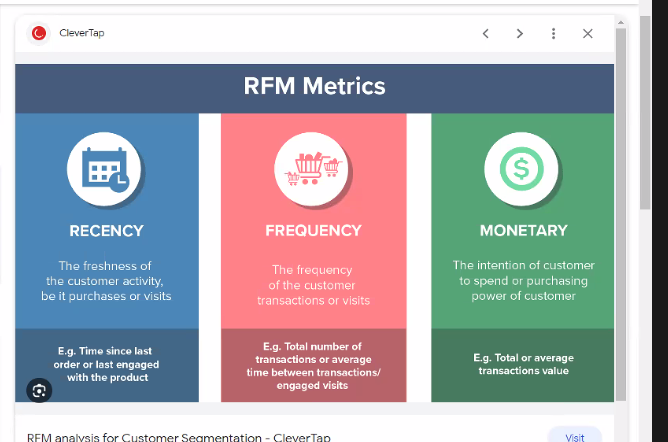

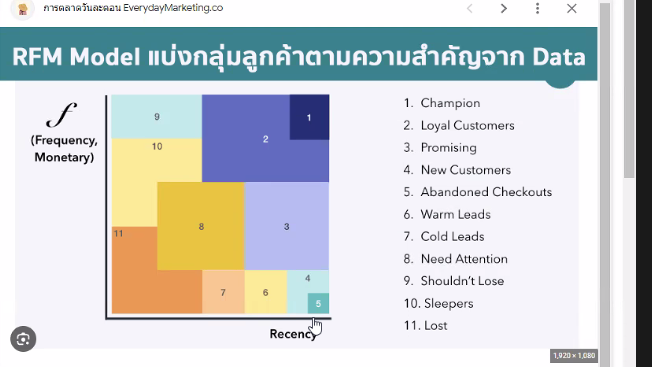

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *

In [3]:
df_Transaction = pd.read_csv("data/online_retail_II.csv")
df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df_Transaction

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df_Transaction = df_Transaction[df_Transaction["Quantity"]>0]

df_Transaction = df_Transaction[df_Transaction["Price"]>0]

df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041671 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1041671 non-null  object 
 1   StockCode    1041671 non-null  object 
 2   Description  1041671 non-null  object 
 3   Quantity     1041671 non-null  int64  
 4   InvoiceDate  1041671 non-null  object 
 5   Price        1041671 non-null  float64
 6   Customer ID  805549 non-null   float64
 7   Country      1041671 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 71.5+ MB


In [6]:
df_Transaction = df_Transaction.dropna(subset=["Customer ID"])
df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [7]:
df_Transaction["Revenue"] = df_Transaction["Quantity"] * df_Transaction["Price"]
df_Transaction.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [8]:
df_Transaction["InvoiceDate"] = pd.to_datetime(df_Transaction["InvoiceDate"])

In [9]:
# Extract the year from the "InvoiceDate" column and assign it to a new "year" column
df_Transaction["year"] = df_Transaction["InvoiceDate"].apply(lambda x: x.year)

# Extract the month number from the "InvoiceDate" column and assign it to a new "month_num" column
df_Transaction["month_num"] = df_Transaction["InvoiceDate"].apply(lambda x: x.month)

# Extract the day number from the "InvoiceDate" column and assign it to a new "day_num" column
df_Transaction["day_num"] = df_Transaction["InvoiceDate"].apply(lambda x: x.day)

# Extract the hour from the "InvoiceDate" column and assign it to a new "hour" column
df_Transaction["hour"] = df_Transaction["InvoiceDate"].apply(lambda x: x.hour)

# Extract the minute from the "InvoiceDate" column and assign it to a new "minute" column
df_Transaction["minute"] = df_Transaction["InvoiceDate"].apply(lambda x: x.minute)

# Extract the second from the "InvoiceDate" column and assign it to a new "second" column
df_Transaction["second"] = df_Transaction["InvoiceDate"].apply(lambda x: x.second)

# extracting month from the Invoice date
df_Transaction["Month"] = df_Transaction["InvoiceDate"].dt.month_name()

# extracting day from the Invoice date
df_Transaction["Day"] = df_Transaction["InvoiceDate"].dt.day_name()

In [10]:
df_Transaction

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,year,month_num,day_num,hour,minute,second,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12,1,7,45,0,December,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,1,7,45,0,December,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009,12,1,7,45,0,December,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009,12,1,7,45,0,December,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009,12,1,7,45,0,December,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12,50,0,December,Friday
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,50,0,December,Friday
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,50,0,December,Friday
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12,9,12,50,0,December,Friday


In [11]:
sum_sales_2011 = df_Transaction.groupby("InvoiceDate")["Revenue"].sum().reset_index()
sum_sales_2011

,InvoiceDate,Revenue
0,2009-12-01 07:45:00,505.30
1,2009-12-01 07:46:00,145.80
2,2009-12-01 09:06:00,630.33
3,2009-12-01 09:08:00,310.75
4,2009-12-01 09:24:00,2286.24
...,...,...
34580,2011-12-09 12:23:00,124.60
34581,2011-12-09 12:25:00,140.64
34582,2011-12-09 12:31:00,329.05
34583,2011-12-09 12:49:00,339.20


In [12]:
sum_sales_m = df_Transaction.groupby("month_num")["Revenue"].sum().reset_index()
sum_sales_m

,month_num,Revenue
0,1,1126764.102
1,2,953508.416
2,3,1295109.751
3,4,1063809.553
4,5,1278580.350
5,6,1300280.270
6,7,1191727.751
7,8,1249586.550
8,9,1784453.383
9,10,2075998.790


In [13]:
max_date = df_Transaction["InvoiceDate"].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [14]:
recency = (max_date - df_Transaction.groupby("Customer ID")["InvoiceDate"].max()).dt.days

frequency = df_Transaction.groupby("Customer ID")["Invoice"].nunique()

monetary = df_Transaction.groupby("Customer ID")["Revenue"].sum()

# Merge the recency, frequency, and monetary DataFrames
rfm = pd.DataFrame({"Recency":recency, "Frequency":frequency, "Monetary":monetary})

# Print the RFM DataFrame
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,12,77556.46
12347.0,1,8,5633.32
12348.0,74,5,2019.40
12349.0,18,4,4428.69
12350.0,309,1,334.40
...,...,...,...
18283.0,3,22,2736.65
18284.0,431,1,461.68
18285.0,660,1,427.00


In [15]:
help(setup)

Help on function setup in module pycaret.clustering.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, preprocess: bool = True, create_date_columns: List[str] = ['day', 'month', 'year'], imputation_type: Optional[str] = 'simple', numeric_imputation: str = 'mean', categorical_imputation: str = 'mode', text_features_method: str = 'tf-idf', max_encodin

In [16]:
data = rfm

s = setup(data,
          session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(5878, 3)"
2,Transformed data shape,"(5878, 3)"
3,Numeric features,3
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [17]:
# functional API
kmeans = create_model('kmeans',num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9157,16831.6131,0.4182,0,0,0


In [18]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [19]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

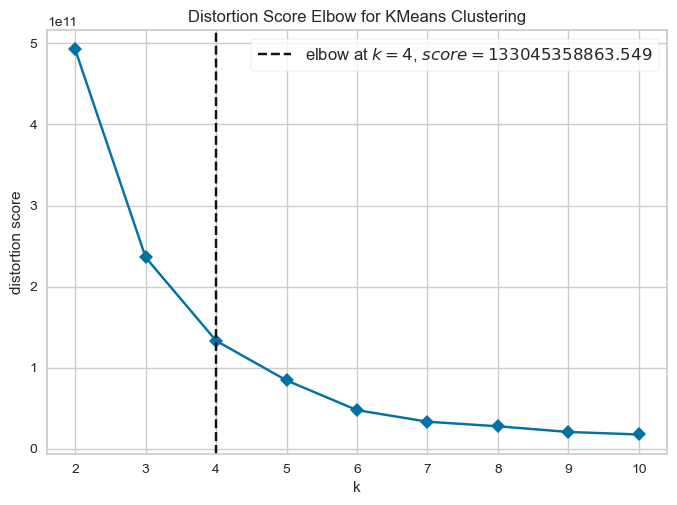

In [20]:
plot_model(kmeans, plot = 'elbow')

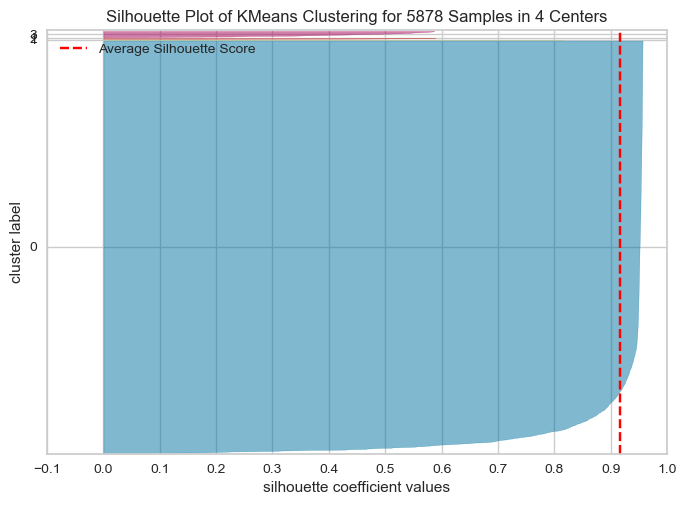

In [21]:
plot_model(kmeans, plot = 'silhouette')

In [22]:
result = assign_model(kmeans)
result.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,325,12,77556.460938,Cluster 3
12347.0,1,8,5633.319824,Cluster 0
12348.0,74,5,2019.400024,Cluster 0
12349.0,18,4,4428.689941,Cluster 0
12350.0,309,1,334.399994,Cluster 0


In [23]:
cluster_counts = result['Cluster'].value_counts()
cluster_counts

Cluster
Cluster 0    5774
Cluster 3      89
Cluster 2      13
Cluster 1       2
Name: count, dtype: int64

In [24]:
summary = result.groupby("Cluster").mean()[["Recency", "Frequency", "Monetary"]]
summary

,Recency,Frequency,Monetary
Cluster,,,
Cluster 0,203.134396,5.319189,1906.647949
Cluster 1,0.500000,148.000000,568712.062500
Cluster 2,6.923077,127.384615,177016.671875
Cluster 3,51.258427,48.359551,37031.496094


In [25]:
# Define alternative names for each cluster
# เน้นดู busket size หรือ Monetary ในการกำหนดกลุ่มแบบง่ายๆ
"""
alternative_names = {
    'Cluster 4': 'Bronze',
    'Cluster 0': 'Silver',
    'Cluster 2': 'Gold',
    'Cluster 3': 'Platinum',
    'Cluster 1': 'VIP'
}
"""

alternative_names = {
    'Cluster 0': 'Bronze',
    'Cluster 3': 'Silver',
    'Cluster 1': 'Gold',
    'Cluster 2': 'Platinum',
}

In [26]:
result["Cluster"] = result["Cluster"].replace(alternative_names)
result

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,325,12,77556.460938,Silver
12347.0,1,8,5633.319824,Bronze
12348.0,74,5,2019.400024,Bronze
12349.0,18,4,4428.689941,Bronze
12350.0,309,1,334.399994,Bronze
...,...,...,...,...
18283.0,3,22,2736.649902,Bronze
18284.0,431,1,461.679993,Bronze
18285.0,660,1,427.000000,Bronze


In [27]:
result.to_csv("data/df_clustering.csv")

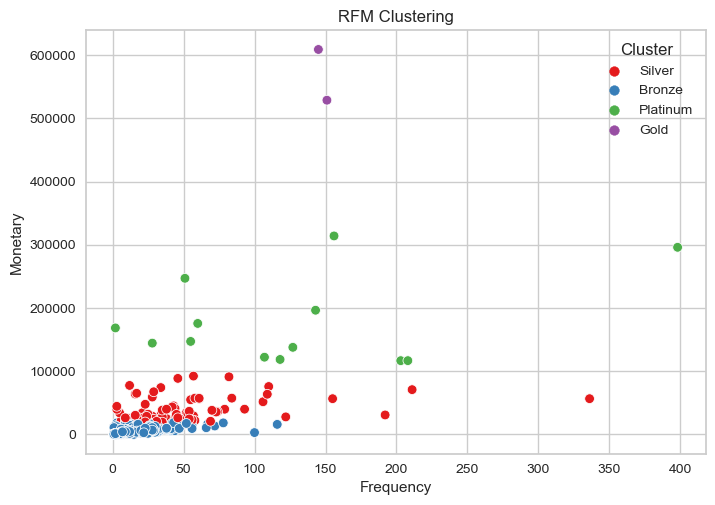

In [28]:
# Create scatter plot with clusters as the legend
sns.scatterplot(data=result, x='Frequency', y='Monetary', hue='Cluster', palette='Set1')

# Set plot title and axis labels
plt.title('RFM Clustering')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# Display the plot
plt.show()

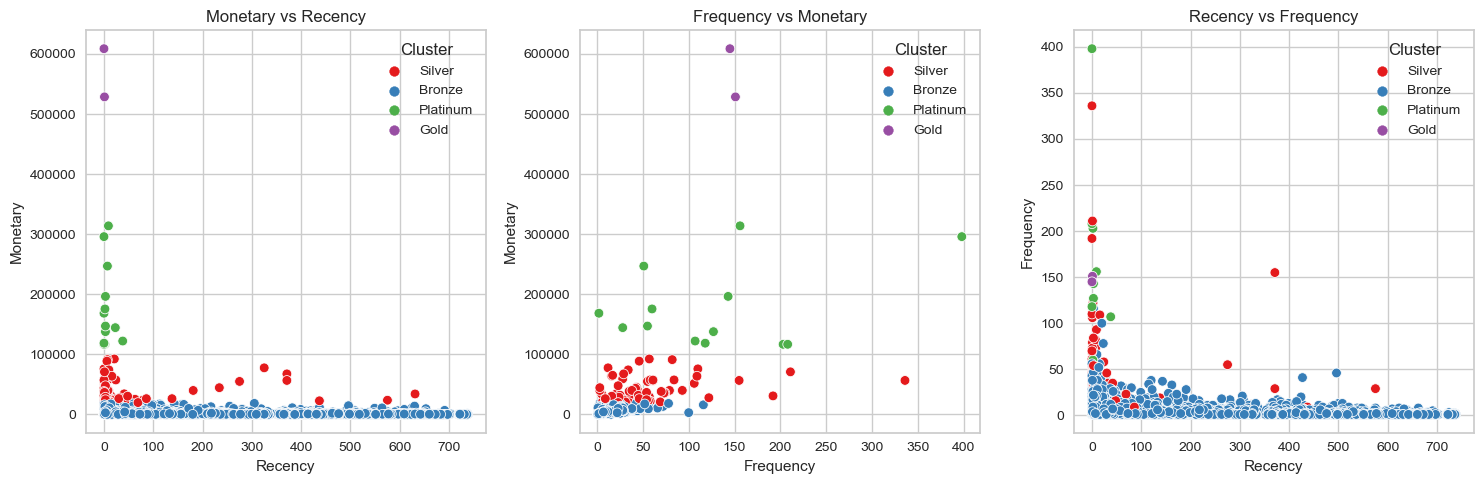

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(data=result, x="Recency", y="Monetary", hue="Cluster", palette="Set1", ax=axes[0])
axes[0].set_title("Monetary vs Recency")
axes[0].set_xlabel("Recency")
axes[0].set_ylabel("Monetary")

sns.scatterplot(data=result, x="Frequency", y="Monetary", hue="Cluster", palette="Set1", ax=axes[1])
axes[1].set_title("Frequency vs Monetary")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Monetary")

sns.scatterplot(data=result, x="Recency", y="Frequency", hue="Cluster", palette="Set1", ax=axes[2])
axes[2].set_title("Recency vs Frequency")
axes[2].set_xlabel("Recency")
axes[2].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

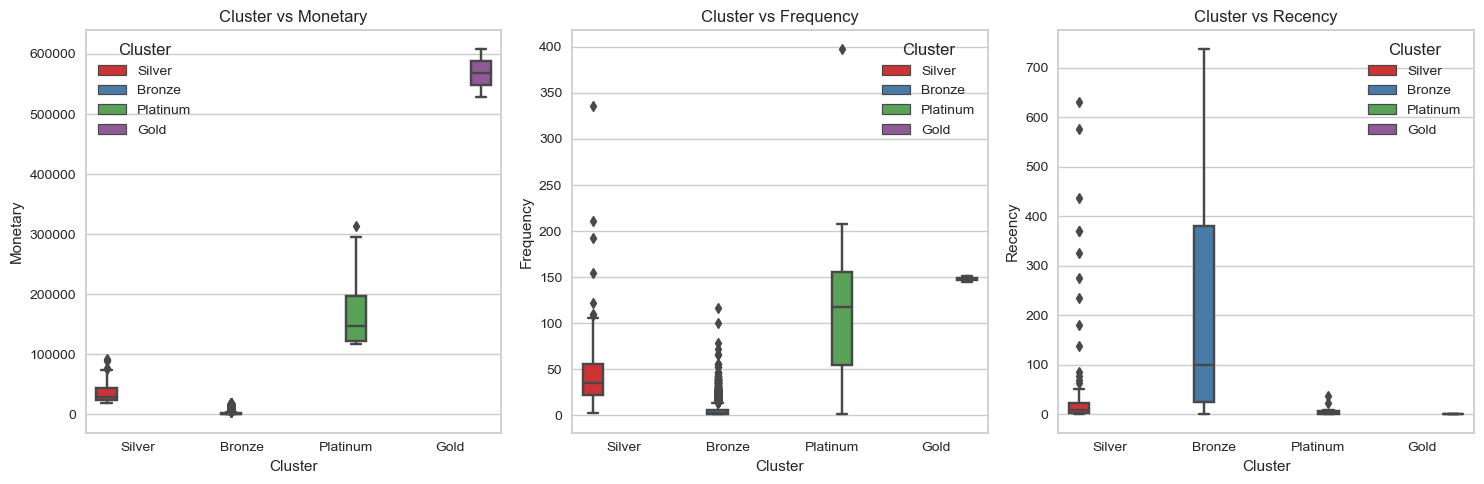

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Box plot : Cluster vs. Monetary
sns.boxplot(data=result, x="Cluster", y="Monetary", hue="Cluster", palette="Set1", ax=axes[0])
axes[0].set_title("Cluster vs Monetary")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Monetary")

sns.boxplot(data=result, x="Cluster", y="Frequency", hue="Cluster", palette="Set1", ax=axes[1])
axes[1].set_title("Cluster vs Frequency")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Frequency")

sns.boxplot(data=result, x="Cluster", y="Recency", hue="Cluster", palette="Set1", ax=axes[2])
axes[2].set_title("Cluster vs Recency")
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Recency")

plt.tight_layout()

plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
import graphviz

In [32]:
x = result.drop(["Cluster"], axis=1)
x.head(3)

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,12,77556.460938
12347.0,1,8,5633.319824
12348.0,74,5,2019.400024


In [33]:
y = result["Cluster"]
y.head(3)

Customer ID
12346.0    Silver
12347.0    Bronze
12348.0    Bronze
Name: Cluster, dtype: object

In [34]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=23)
clf = clf.fit(x,y)

[Text(0.3333333333333333, 0.875, 'x[2] <= 19164.59\nentropy = 0.14\nsamples = 5878\nvalue = [5774.0, 2.0, 13.0, 89.0]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 5774\nvalue = [5774, 0, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 104542.602\nentropy = 0.677\nsamples = 104\nvalue = [0, 2, 13, 89]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 89\nvalue = [0, 0, 0, 89]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 421274.438\nentropy = 0.567\nsamples = 15\nvalue = [0, 2, 13, 0]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]')]

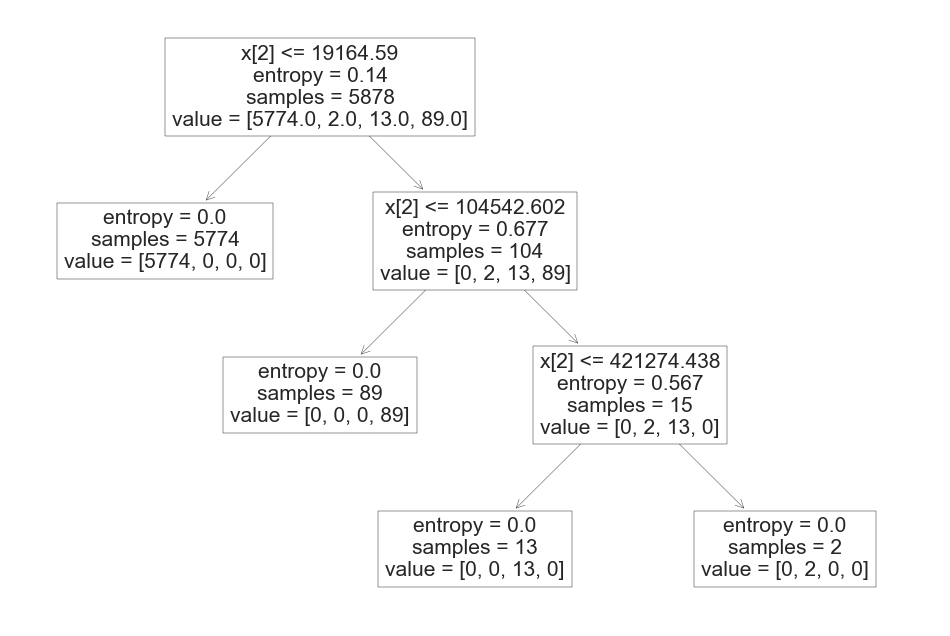

In [35]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf)

In [36]:
x.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')